<a href="https://colab.research.google.com/github/mayafetzer/cheg472/blob/main/CHEG472_Test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Maya Fetzer

CHEG472

Test 2

Instructions:
This is an open-book exam.
You are required to download the dataset and perform exploratory data analysis (EDA) using Python.
Your analysis should include data cleaning, visualization, and preparing the dataset for machine learning tasks in the future.
Ensure you comment on your code.
The test will last for 60 minutes.
Once completed, submit a link to your GitHub repository with your code and findings on Moodle.
Question:
You are provided with a dataset on Dry Reforming of Methane. Dry reforming of methane (DRM) is an important process used to convert methane (CH₄) and carbon dioxide (CO₂) into synthesis gas (syngas), which is a mixture of hydrogen (H₂) and carbon monoxide (CO).

This process is particularly important because it utilizes two greenhouse gases, methane and carbon dioxide, and converts them into valuable chemical products.

Dataset:
Download the dataset provided below, which includes various parameters affecting the DRM process, such as catalyst type, methane conversion, and syngas ratio. Use this dataset to answer the following:

Perform data inspection and identify any missing or inconsistent values.
Handle any missing data using appropriate techniques (e.g., fill missing values or remove incomplete rows).
Apply data transformation techniques, such as normalization or encoding categorical variables, to prepare the data for machine learning tasks.
Generate summary statistics (mean, median, standard deviation, etc.) for the dataset.
Create visualizations (scatter plots, histograms, box plots) to identify trends and relationships between variables.
Analyze the correlations between features and target variables (CH₄ Conversion, CO₂ Conversion, and Syngas Ratio).
Dataset Column Descriptions:
Catalyst: The catalyst material used to accelerate the reaction. Different catalysts can have varying effects on conversion efficiency.

Ratio of CH₄ in Feed: The proportion of methane in the feedstock, affecting the conversion efficiency.

Reaction Temperature: The temperature at which the reaction takes place. High temperatures are needed for the DRM reaction to proceed effectively.

Ni Loading: The nickel content in the catalyst. Nickel is often used in DRM because of its catalytic properties.

Reaction Time: The time for which the reaction is allowed to occur. Longer reaction times can enhance the conversion of CH₄ and CO₂.

Pore Size: The size of the pores in the catalyst, which influences the accessibility of reactants to active sites.

Pore Volume: The total pore volume of the catalyst, influencing the surface area available for the reaction.

Surface Area: The surface area of the catalyst. A larger surface area provides more active sites for the reaction to occur.

H₂-TPR Peak Temperature: The temperature at which the maximum reduction of the catalyst occurs. This indicates the reducibility of the catalyst.

Ni Particle Size: The size of the nickel particles in the catalyst. Smaller particles generally result in higher surface area.

Ni Dispersion: The extent to which nickel is dispersed across the catalyst surface. Higher dispersion typically correlates with better catalytic activity.

Modifier Electronegativity: Electronegativity of modifying agents added to the catalyst. Modifiers can impact catalytic activity and selectivity.

GHSV (Gas Hourly Space Velocity): The volumetric flow rate of gas through the reactor relative to the volume of the catalyst. Higher GHSV means a faster flow rate, which can affect the reaction kinetics.

CH₄ Conversion (Target): The percentage of methane converted into products.

CO₂ Conversion (Target): The percentage of carbon dioxide converted during the reaction.

Syngas Ratio (Target): The ratio of hydrogen to carbon monoxide in the syngas produced. This is important for syngas applications such as fuel synthesis.

**STEP 1: UPLOAD THE DATA FILE AND UNDERSTAND ITS BASIC FEATURES**

In [3]:
import pandas as pd


# Replace '/path/to/your/file.xlsx' with the actual file path
file_path = '/content/Test2_dataset.xlsx'


# Read the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)


# Print the first few rows of the DataFrame
print("The first 5 rows of the dataset:")
print(df.head())


# Print the description of the DataFrame
print("The descriptive statistics of the dataset")
print(df.describe())


# Get the data types of all columns
data_types = df.dtypes
# Print the datatypes of each column
print("The data types of each column:")
print(data_types)


# Get the numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Get the categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
# Print the results
print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

The first 5 rows of the dataset:
             Catalyst  Ratio of CH4 in Feed  Reaction Temperature  Ni Loading  \
0         Ni−SiO2‑550                  0.15                   650        10.0   
1         Ni−SiO2‑750                  0.15                   650        10.0   
2   Ni/Sn0.2−SiO2‑550                  0.15                   650        10.0   
3   Ni/Sn0.2−SiO2‑750                  0.15                   650        10.0   
4  Ni/Sn0.05−SiO2‑550                  0.15                   650        10.0   

   Reaction Time  Pore Size  Pore Volume  Surface Area  \
0            0.5        4.7         0.58         476.0   
1            0.5        4.7         0.58         476.0   
2            0.5        5.2         0.58         455.0   
3            0.5        5.2         0.58         455.0   
4            0.5        4.8         0.82         599.0   

   H2-TPR Peak Temperature  Ni Particle Size  Ni Dispersion  \
0                    640.0               2.9            NaN   
1    

**STEP 2: LOCATE MISSING DATA IN THE DATASET**

In [4]:
# Check for missing data
missing_data = df.isnull().sum()
print("Total missing values for each column:")
missing_data[missing_data > 0]


Total missing values for each column:


,0
Ni Dispersion,1056
CH4 Conversion,49
CO2 Conversion,77
Syngas_Ratio,76


**STEP 3: REMOVE MISSING DATA **

In [5]:
# Choose a method to get rid of missing data.

# For this code, I am choosing dropping rows with missing data. I am choosing this method because
# if this dataset is to be used later for machine learning purposes, it is better to have the dataset
# contain no missing data points. This would allow for regression/correlation analysis to not be skewed
# by the values if I was to replace the missing value with another number.

df_cleaned = df.dropna()


**STEP 4: SUMMARY STATISTICS**

In [6]:
import pandas as pd


# Get summary statistics for numerical columns
numerical_stats = df_cleaned.describe()


# Get summary statistics for categorical columns (if applicable)
categorical_stats = df_cleaned.select_dtypes(include='object').describe()


# Print the summary statistics
print("Summary Statistics for Numerical Columns:")
print(numerical_stats)
print("\nSummary Statistics for Categorical Columns:")
print(categorical_stats)

Summary Statistics for Numerical Columns:
       Ratio of CH4 in Feed  Reaction Temperature  Ni Loading  Reaction Time  \
count            594.000000            594.000000  594.000000     594.000000   
mean               0.365529            703.888889    9.543805      18.607290   
std                0.143465             78.283834    5.839814      26.564926   
min                0.100000            450.000000    0.300000       0.200000   
25%                0.250000            650.000000    4.932500       1.000000   
50%                0.400000            700.000000    9.770000       8.000000   
75%                0.500000            750.000000   10.600000      24.000000   
max                0.500000            900.000000   30.800000     200.000000   

        Pore Size  Pore Volume  Surface Area  H2-TPR Peak Temperature  \
count  594.000000   594.000000    594.000000               594.000000   
mean    11.094705     0.431652    196.171128               656.206515   
std      8.772826 

**STEP 5: LOCATE THE OUTLIERS**

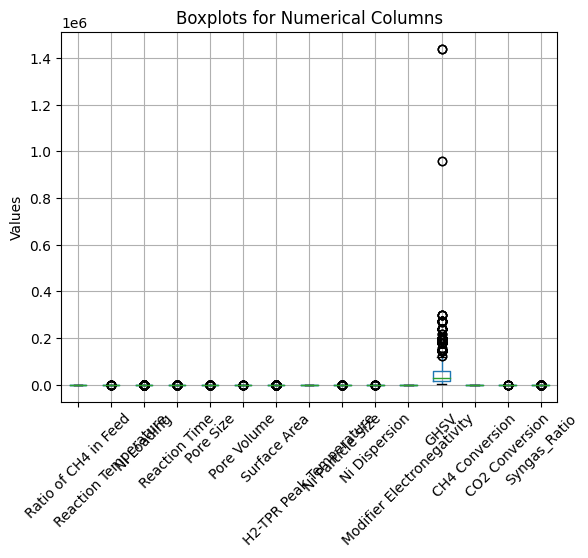

No outliers found in column 'Ratio of CH4 in Feed'
Outliers in column 'Reaction Temperature': [400, 400, 400, 400, 450, 450, 400, 400, 400, 400, 450, 450, 450, 450, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 1000, 1000, 1000, 1000, 1000]
Outliers in column 'Ni Loading': [22.2, 27.9, 30.8, 23.1, 18.2, 23.1, 18.2, 23.1, 18.2, 18.2, 18.2, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 23.0, 20.0, 25.0, 20.0, 20.0, 20.2, 32.0, 51.1, 20.2, 32.0, 19.7, 19.7, 20.0, 40.0, 60.0, 26.9, 27.9, 20.0, 20.0, 20.0, 20.0, 20.0, 30.1, 30.1, 20.0, 25.0, 23.0, 23.0, 20.0, 20.0, 25.0, 23.0, 23.0, 20.0, 20.0, 25.0, 23.0, 23.0, 20.0, 20.0, 25.0, 23.0, 23.0, 20.0, 20.0, 25.0, 23.0, 23.0, 20.0, 20.0, 25.0, 23.0, 23.0, 20.0, 20.0, 25.0, 23.0, 23.0, 20.0, 20.0, 18.5, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 18.9, 19.6, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 2

In [7]:
import matplotlib.pyplot as plt
import numpy as np


# Calculate outliers for each column
outliers_dict = {}


# Only check the columns that are numerical and would contain outliers
columns_to_check = df.select_dtypes(include=['int64', 'float64']).columns


# Create boxplots for specified columns
df[columns_to_check].boxplot()
plt.title("Boxplots for Numerical Columns")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()


# Check for outliers and plot the boxplot
for col in columns_to_check:
   q1 = np.quantile(df[col], 0.25)
   q3 = np.quantile(df[col], 0.75)
   iqr = q3 - q1
   lower_bound = q1 - 1.5 * iqr
   upper_bound = q3 + 1.5 * iqr
   outliers = df[col][(df[col] < lower_bound) | (df[col] > upper_bound)]
   outliers_dict[col] = outliers.tolist()


# Print outliers for each column
for col, outliers in outliers_dict.items():
   if outliers:
       print(f"Outliers in column '{col}': {outliers}")
   else:
       print(f"No outliers found in column '{col}'")


**STEP 6: REMOVE OUTLIERS**

In [8]:
# Remove outliers from specified columns
df_cleaned = df.copy()
for col in columns_to_check:
   df_cleaned = df_cleaned[~df_cleaned[col].isin(outliers_dict[col])]


# Check to make sure that the outliers were removed from the dataset
for col in columns_to_check:
   if any(outlier in df_cleaned[col].values for outlier in outliers_dict[col]):
       print(f"Outlier(s) from column '{col}' were not removed.")
   else:
       print(f"All outliers were successfully removed from column '{col}'.")


All outliers were successfully removed from column 'Ratio of CH4 in Feed'.
All outliers were successfully removed from column 'Reaction Temperature'.
All outliers were successfully removed from column 'Ni Loading'.
All outliers were successfully removed from column 'Reaction Time'.
All outliers were successfully removed from column 'Pore Size'.
All outliers were successfully removed from column 'Pore Volume'.
All outliers were successfully removed from column 'Surface Area'.
All outliers were successfully removed from column 'H2-TPR Peak Temperature'.
All outliers were successfully removed from column 'Ni Particle Size'.
All outliers were successfully removed from column 'Ni Dispersion'.
All outliers were successfully removed from column 'Modifier Electronegativity'.
All outliers were successfully removed from column 'GHSV'.
All outliers were successfully removed from column 'CH4 Conversion'.
All outliers were successfully removed from column 'CO2 Conversion'.
All outliers were success

**STEP 7: ONE HOT ENCODING OF CATEGORICAL VARIABLES**

In [9]:
import pandas as pd


# Display the first few rows of the original dataset
print("Original DataFrame:")
print(df_cleaned.head())


# Apply one-hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, prefix_sep='_')


# Display the first few rows of the encoded DataFrame
print("\nEncoded DataFrame:")
print(df_encoded.head())

Original DataFrame:
            Catalyst  Ratio of CH4 in Feed  Reaction Temperature  Ni Loading  \
0        Ni−SiO2‑550                  0.15                   650        10.0   
1        Ni−SiO2‑750                  0.15                   650        10.0   
2  Ni/Sn0.2−SiO2‑550                  0.15                   650        10.0   
3  Ni/Sn0.2−SiO2‑750                  0.15                   650        10.0   
5        Ni/(-Al2O3)                  0.15                   800         5.0   

   Reaction Time  Pore Size  Pore Volume  Surface Area  \
0          0.500        4.7         0.58         476.0   
1          0.500        4.7         0.58         476.0   
2          0.500        5.2         0.58         455.0   
3          0.500        5.2         0.58         455.0   
5          4.167       20.9         0.62         128.7   

   H2-TPR Peak Temperature  Ni Particle Size  Ni Dispersion  \
0                    640.0               2.9            NaN   
1                    640

**STEP 8: REMOVE REDUNDANT VARIABLES**

In [10]:
# Identify irrelevant columns (this step is subjective and depends on domain knowledge)

# For this dataset, I don't believe that there are any redundant columns of data.
# All of the columns provide unique data to the dataframe and do not have the same,
# repeated value throughout the columns. So, I am not going to remove any of the
# columns from the dataset. After doing correlation analysis, someone could go back
# and remove variables that have little to no correlation.

**STEP 9: LOOK AT CORRELATION DATA FOR THE CLEANED DATAFRAME AND TARGET VARIABLES**

In [25]:
# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Print the correlation matrix
print(correlation_matrix)

                                  Ratio of CH4 in Feed  Reaction Temperature  \
Ratio of CH4 in Feed                          1.000000              0.040007   
Reaction Temperature                          0.040007              1.000000   
Ni Loading                                    0.154714             -0.089233   
Reaction Time                                 0.003608              0.276240   
Pore Size                                    -0.039278              0.046059   
...                                                ...                   ...   
Catalyst_Y–4%Nd2O                            -0.005636              0.036140   
Catalyst_Y–Ni/SBA-16-MgO                      0.057199             -0.087179   
Catalyst_Zr (10)-Ni(15)/ perlite             -0.066774             -0.001964   
Catalyst_Zr (20)-Ni(15)/perlite,             -0.066774             -0.001964   
Catalyst_–Ni–La2O3                           -0.057584             -0.001388   

                                  Ni Lo

To visualize the relationships between the variables within the dataset, I chose to do scatterplots for each of the variables against the target variables. This helps to understand how changing each one of the variables changes the target. I did this each on a seperate plot to help see the individual relationship as a larger, more complete graph.

I would have lumped the data together as a pairplot, but I didn't find this valuable to the overall analysis of the data. This was going to take a long time to generate and would be very small because there are so many variables within the dataset.

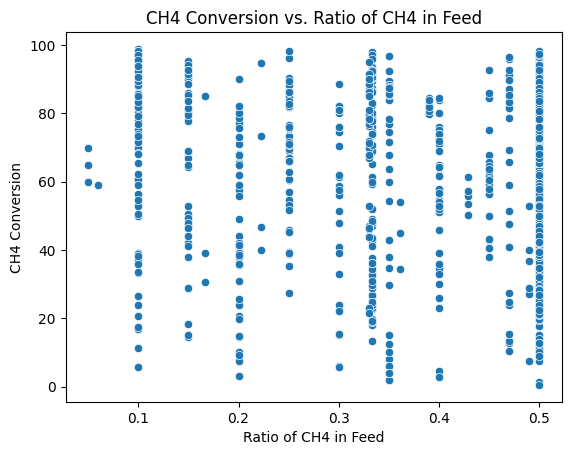

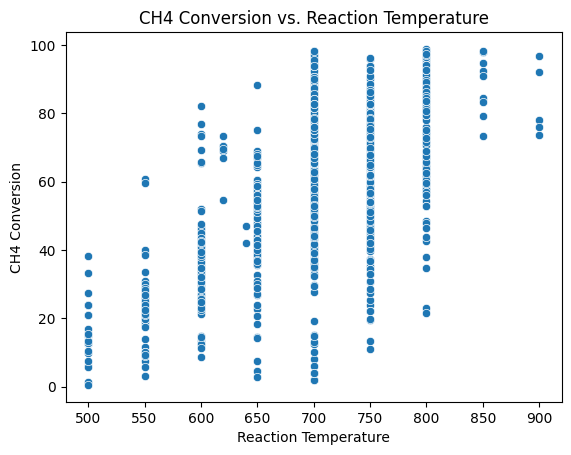

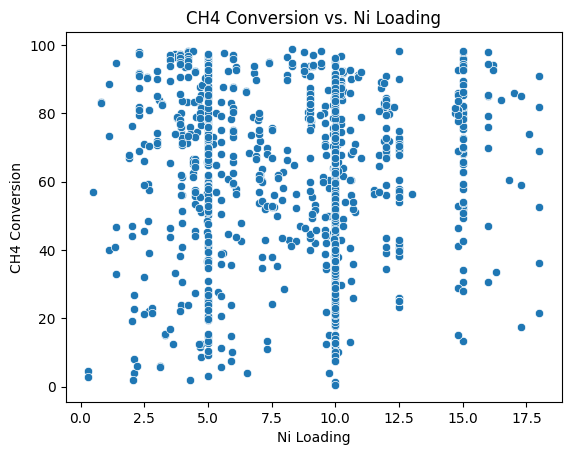

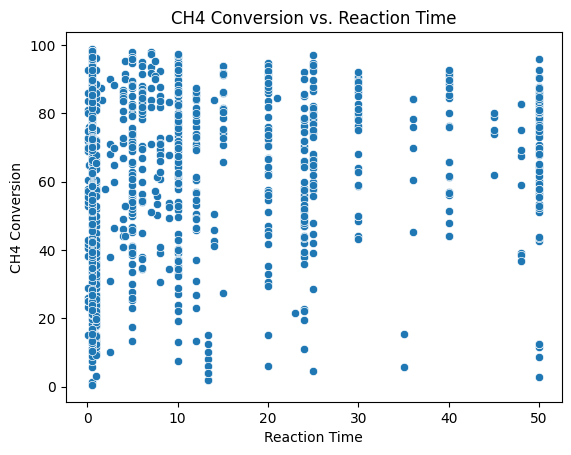

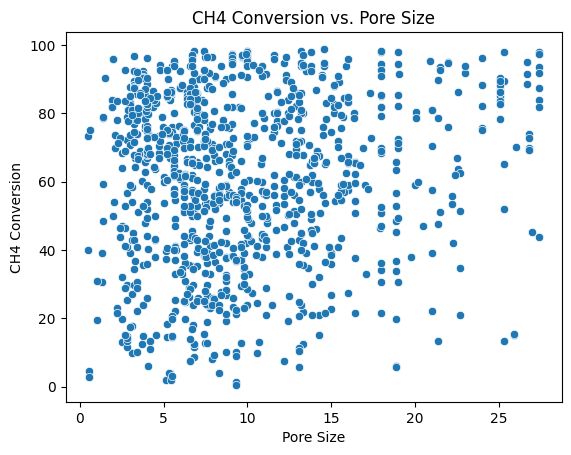

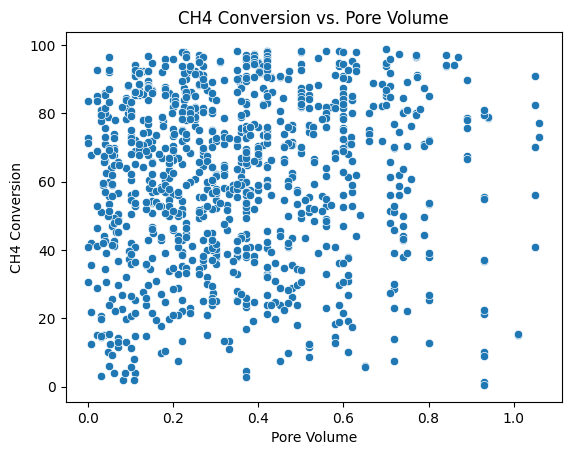

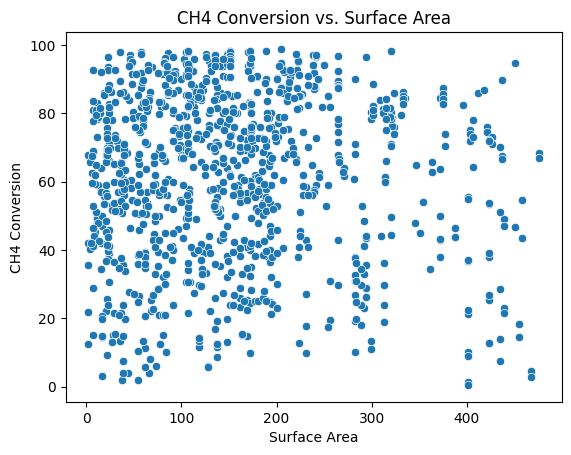

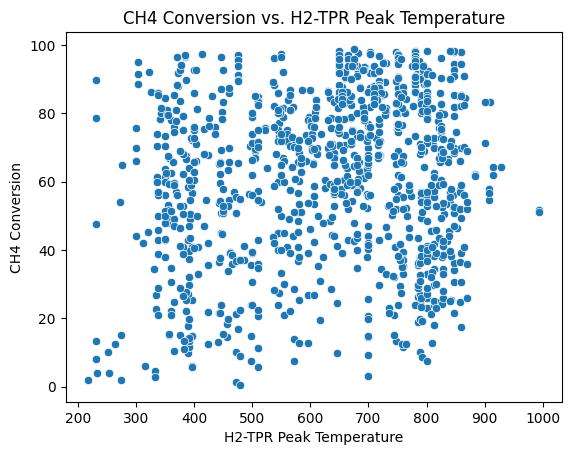

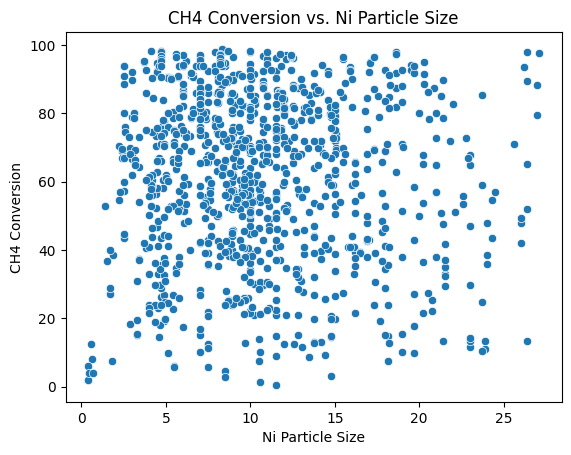

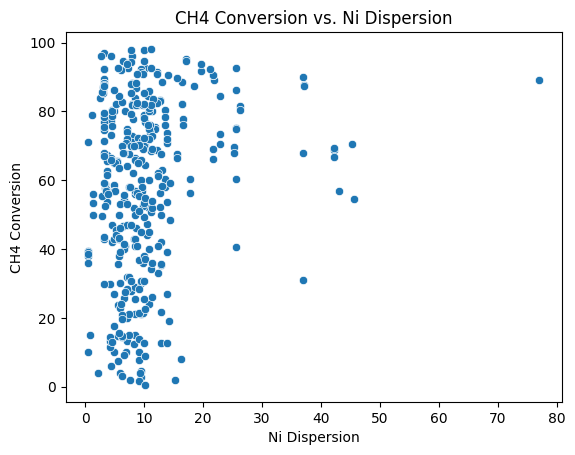

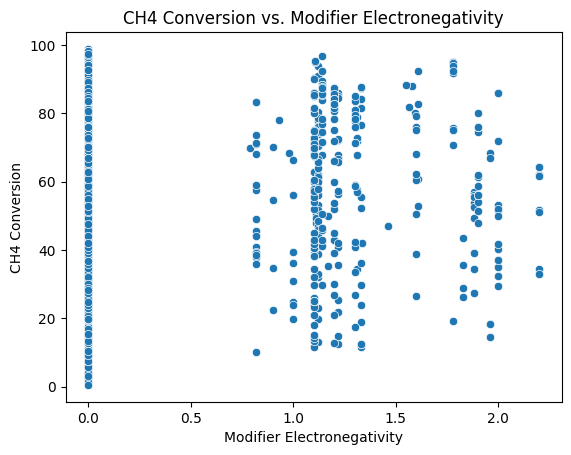

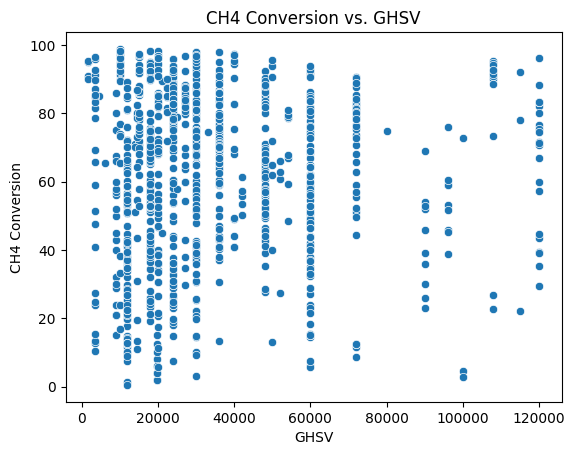

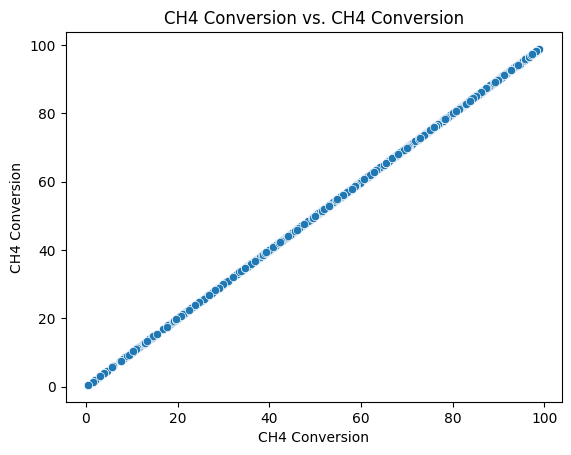

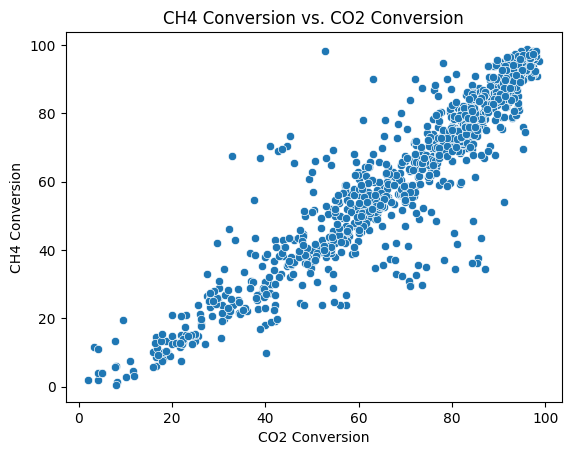

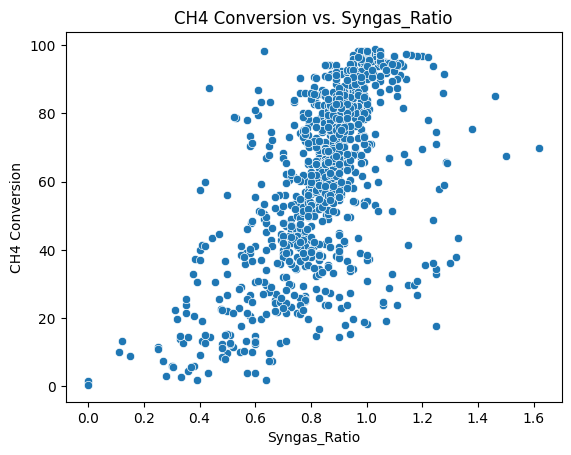

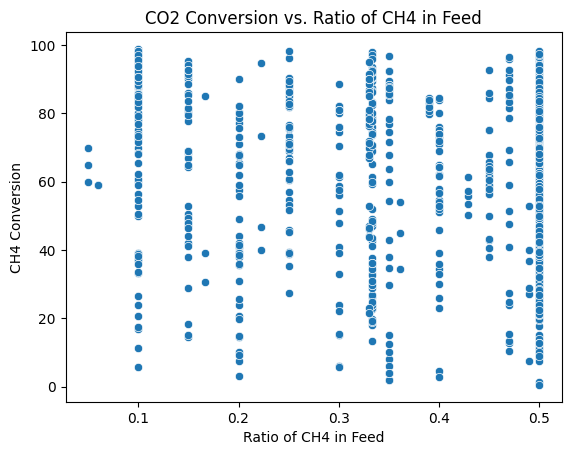

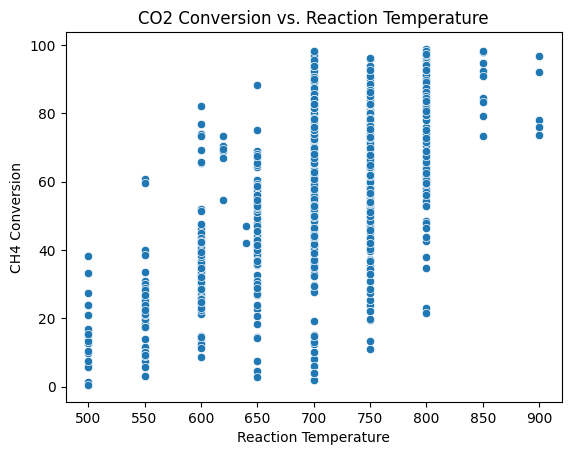

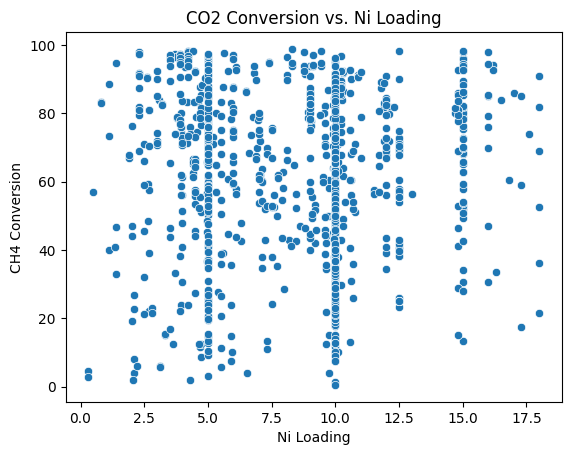

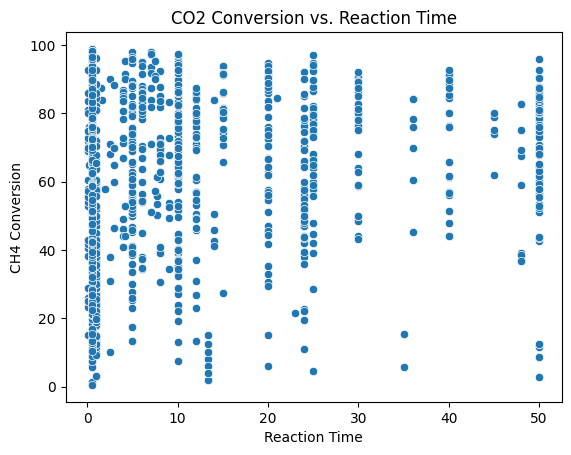

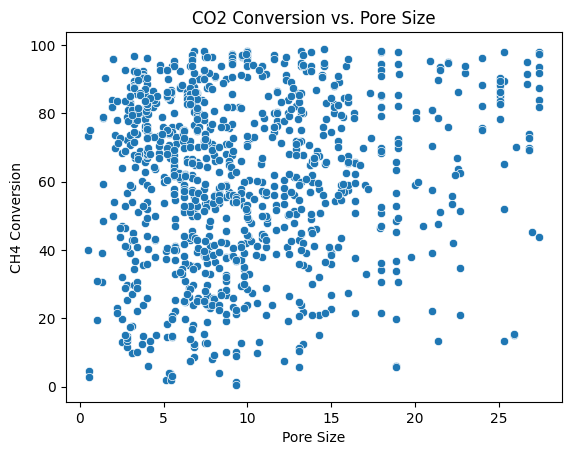

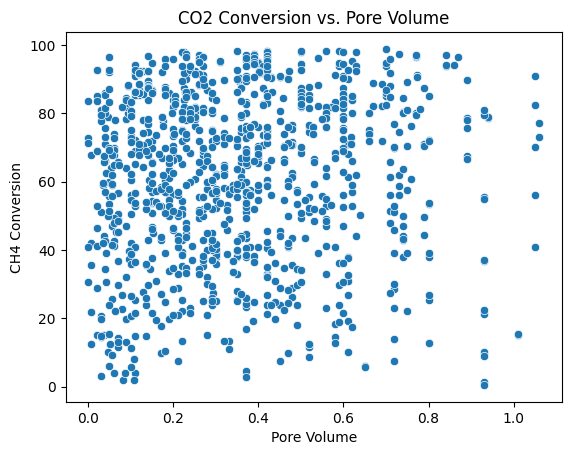

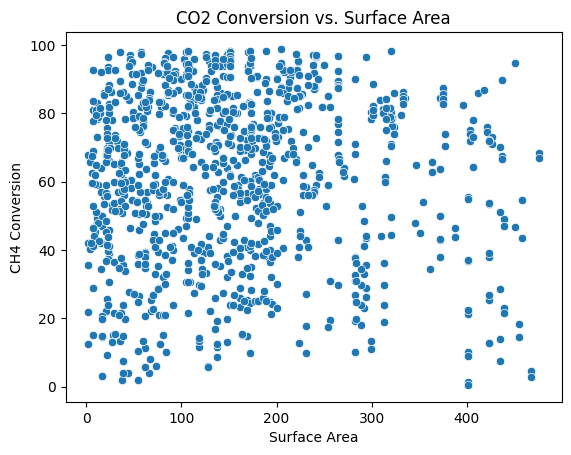

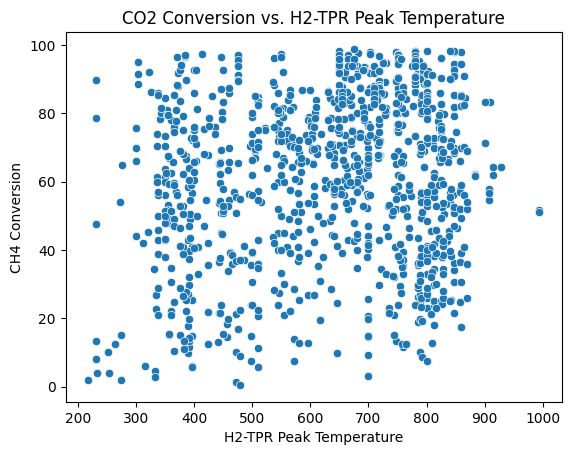

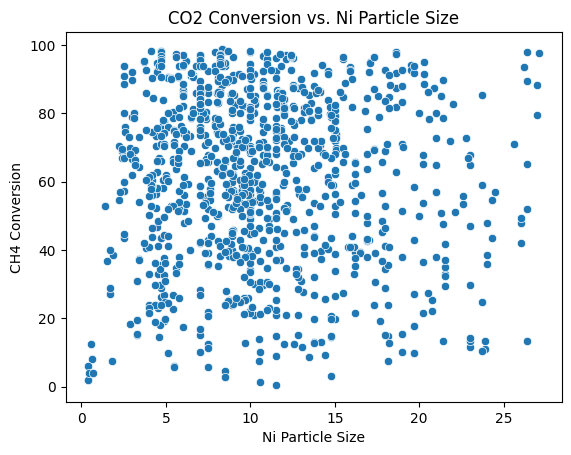

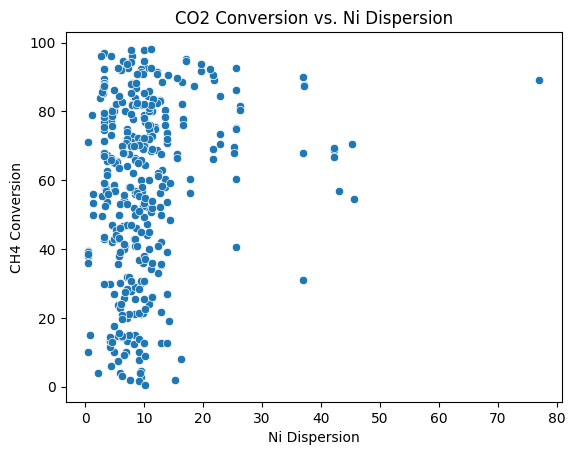

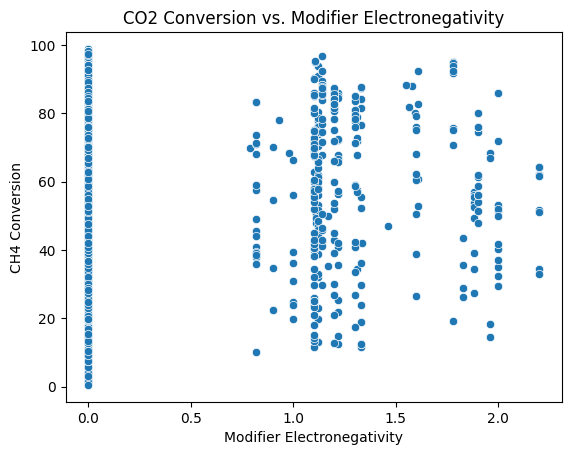

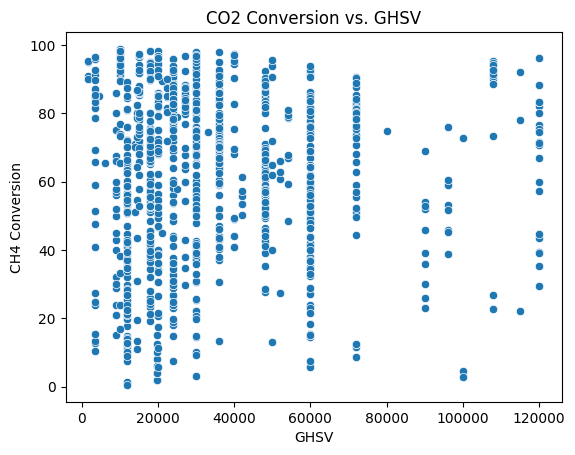

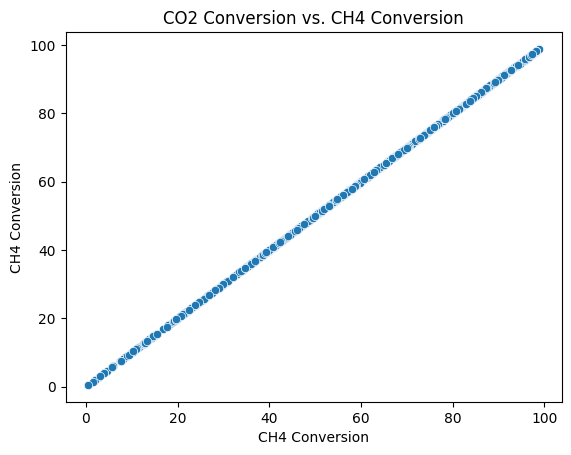

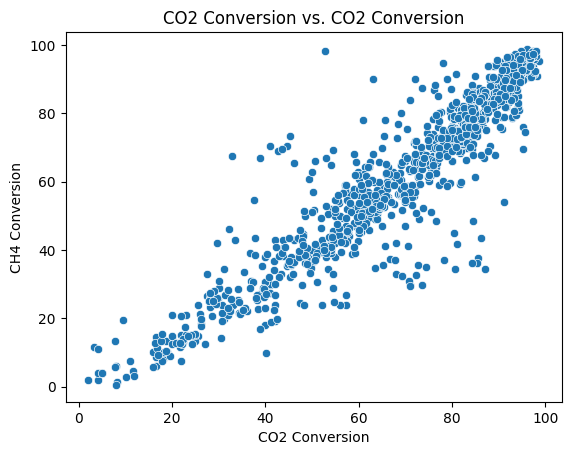

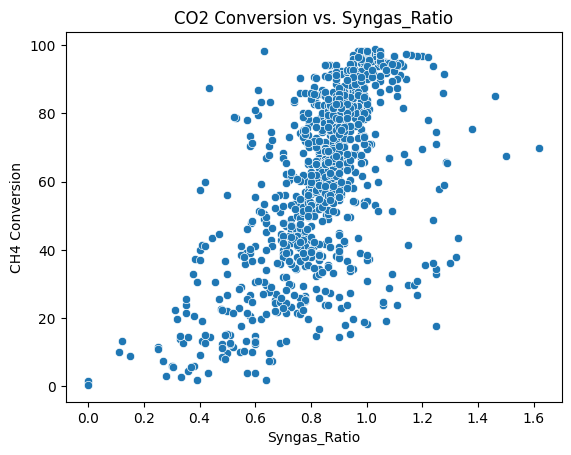

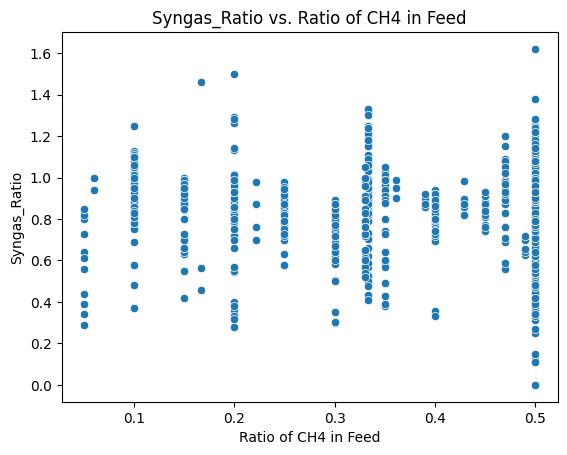

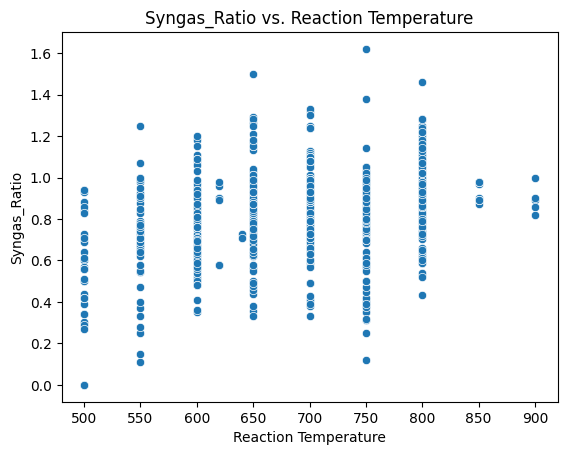

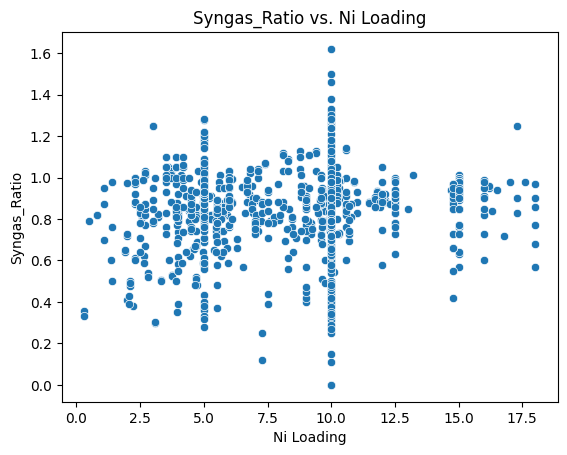

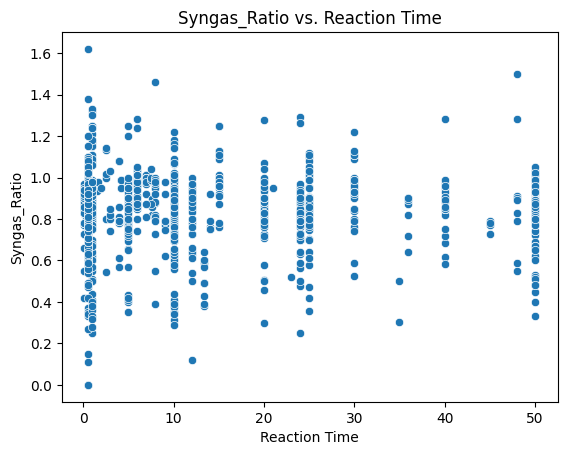

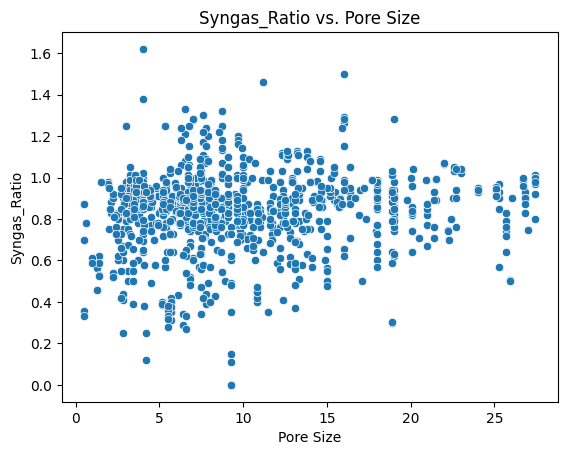

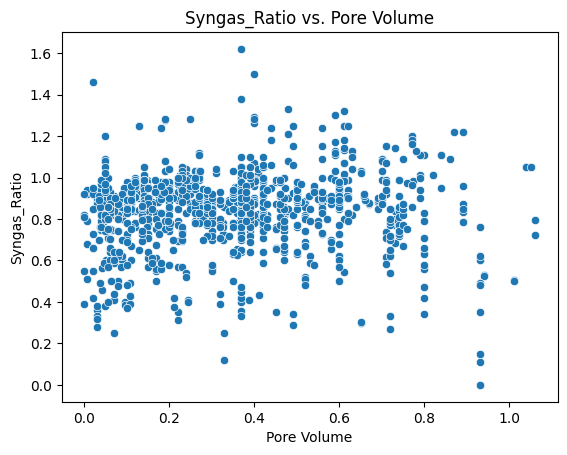

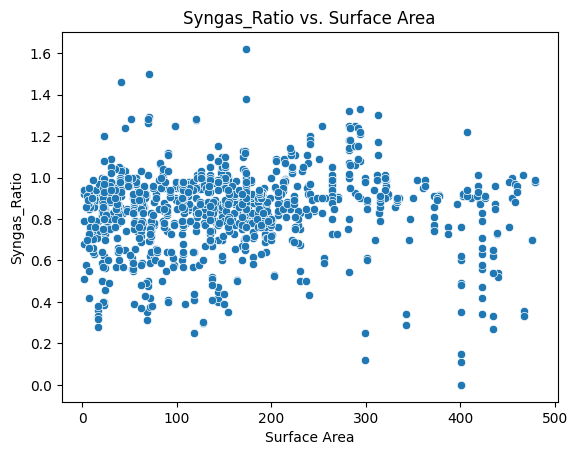

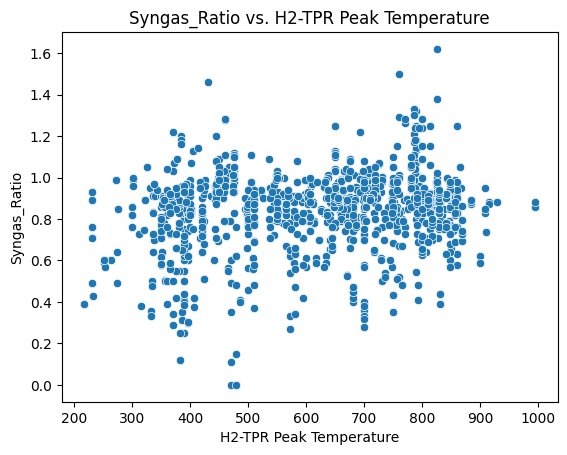

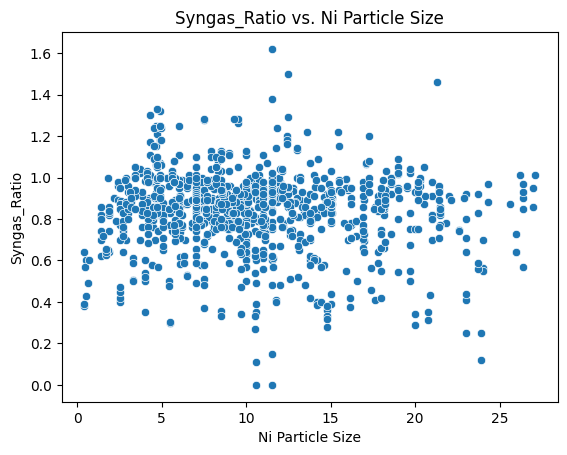

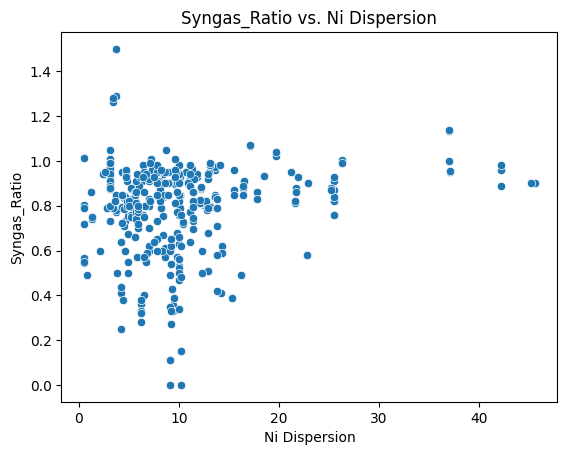

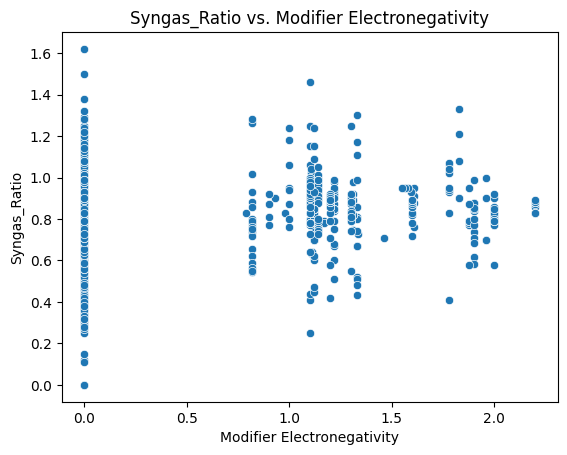

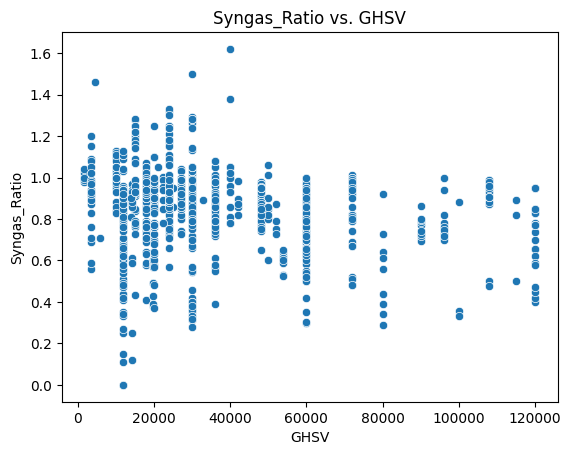

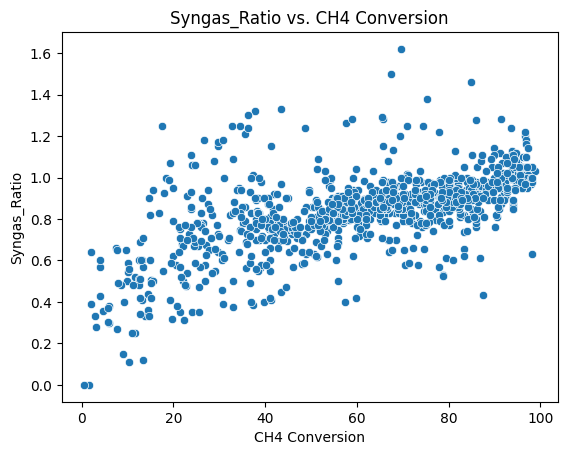

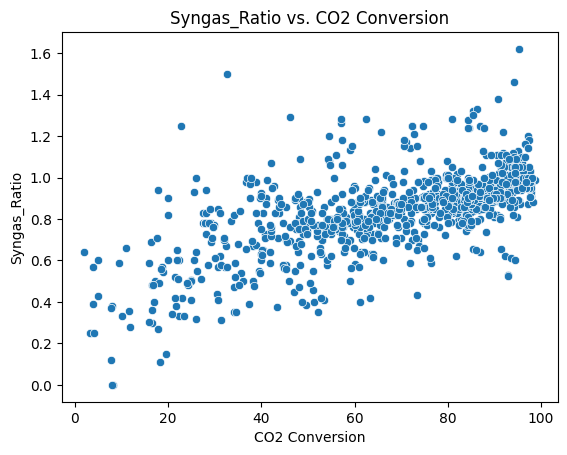

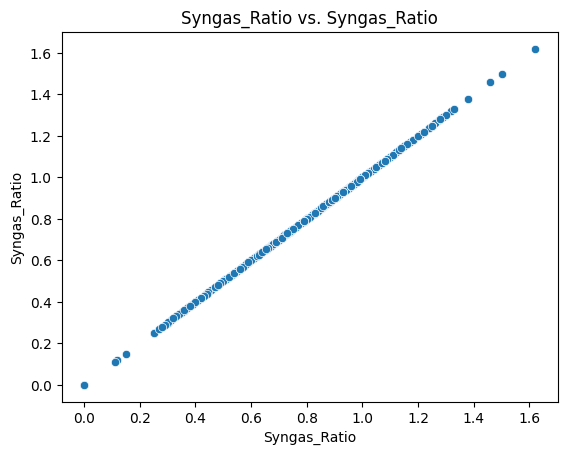

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plots for continuous variables to compare relationships to the target
for variable in numeric_cols:
  sns.scatterplot(x=variable, y='CH4 Conversion', data=df_cleaned)
  plt.title(f'CH4 Conversion vs. {variable}')
  plt.show()

for variable in numeric_cols:
  sns.scatterplot(x=variable, y='CH4 Conversion', data=df_cleaned)
  plt.title(f'CO2 Conversion vs. {variable}')
  plt.show()

for variable in numeric_cols:
  sns.scatterplot(x=variable, y='Syngas_Ratio', data=df_cleaned)
  plt.title(f'Syngas_Ratio vs. {variable}')
  plt.show()

For the dataset, I made correlation matrices for all of the variables and then visualized this with heatmats for the target variables. I thought that the whole heatmap would be too cluttered, and so I only visualized the target variables because those are the correlations that we should care about the most.

CH4 Correlations
Ratio of CH4 in Feed               -0.164658
Reaction Temperature                0.688549
Ni Loading                          0.002198
Reaction Time                       0.148921
Pore Size                           0.102124
                                      ...   
Catalyst_Y–4%Nd2O                   0.030564
Catalyst_Y–Ni/SBA-16-MgO           -0.054964
Catalyst_Zr (10)-Ni(15)/ perlite    0.032149
Catalyst_Zr (20)-Ni(15)/perlite,    0.033760
Catalyst_–Ni–La2O3                  0.020951
Name: CH4 Conversion, Length: 480, dtype: float64


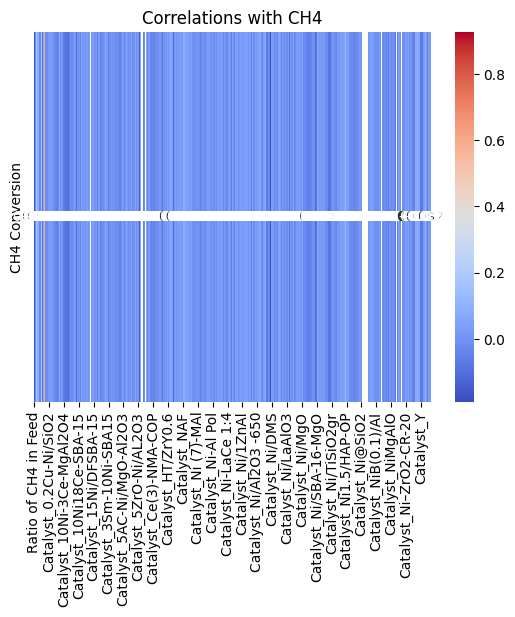

CO2 Correlations
Ratio of CH4 in Feed               -0.146657
Reaction Temperature                0.686526
Ni Loading                          0.001907
Reaction Time                       0.158363
Pore Size                           0.114296
                                      ...   
Catalyst_Y–4%Nd2O                   0.027038
Catalyst_Y–Ni/SBA-16-MgO           -0.045149
Catalyst_Zr (10)-Ni(15)/ perlite    0.022151
Catalyst_Zr (20)-Ni(15)/perlite,    0.026597
Catalyst_–Ni–La2O3                  0.028994
Name: CO2 Conversion, Length: 480, dtype: float64


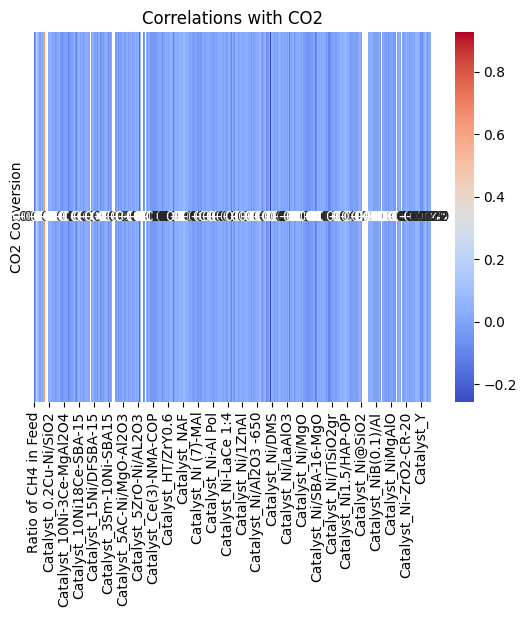

Syngas Ratio Correlations
Ratio of CH4 in Feed               -0.096324
Reaction Temperature                0.349819
Ni Loading                          0.089543
Reaction Time                      -0.022854
Pore Size                           0.101118
                                      ...   
Catalyst_Y–4%Nd2O                   0.019846
Catalyst_Y–Ni/SBA-16-MgO           -0.032868
Catalyst_Zr (10)-Ni(15)/ perlite    0.008142
Catalyst_Zr (20)-Ni(15)/perlite,    0.015179
Catalyst_–Ni–La2O3                  0.009899
Name: Syngas_Ratio, Length: 480, dtype: float64


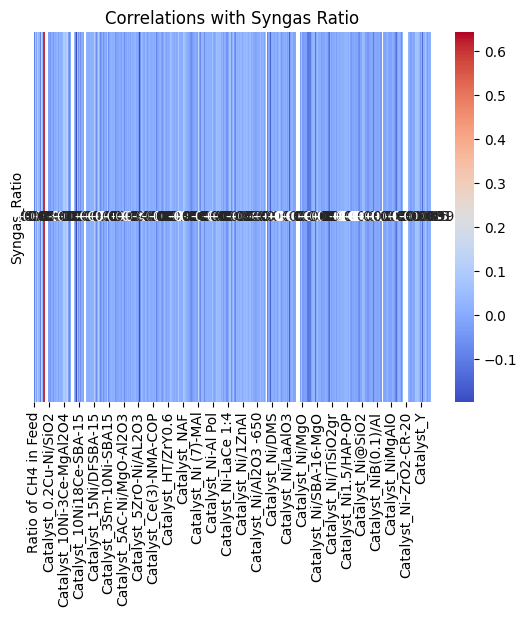

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Write a correlation matrix for the dataframe
corr_matrix = df_encoded.corr()

# Extract correlations related to CH4 (TARGET)
CH4_correlations = corr_matrix['CH4 Conversion'].drop('CH4 Conversion')
print('CH4 Correlations')
print(CH4_correlations)

# Create a heatmap of CH4 (TARGET) correlations
sns.heatmap(CH4_correlations.to_frame().T, annot=True, cmap='coolwarm')
plt.title('Correlations with CH4')
plt.show()

# Extract correlations related to CO2 (TARGET)
CO2_correlations = corr_matrix['CO2 Conversion'].drop('CO2 Conversion')
print('CO2 Correlations')
print(CO2_correlations)

# Create a heatmap of CO2 (TARGET) correlations
sns.heatmap(CO2_correlations.to_frame().T, annot=True, cmap='coolwarm')
plt.title('Correlations with CO2')
plt.show()

# Extract correlations related to Syngas Ratio (TARGET)
Syngas_correlations = corr_matrix['Syngas_Ratio'].drop('Syngas_Ratio')
print('Syngas Ratio Correlations')
print(Syngas_correlations)

# Create a heatmap of Syngas Ratio (TARGET) correlations
sns.heatmap(Syngas_correlations.to_frame().T, annot=True, cmap='coolwarm')
plt.title('Correlations with Syngas Ratio')
plt.show()

Based on this plot, we see that there is a strong positive correlation between the reaction temperature and CH4 as well as the reaction temperature and CO2. Syngas ratio has a weaker, but still strong correlation with reaction temperature.

For the below final visualization, I chose to only visualize the most important relationships in the dataset. I determined that the most important visualizations would be with temperature of the reaction and the three targets because those have the strongest correlation.

**STEP 10: VISUALIZE THE IMPORTANT RELATIONSHIPS**

Text(0, 0.5, 'Reaction Temperature')

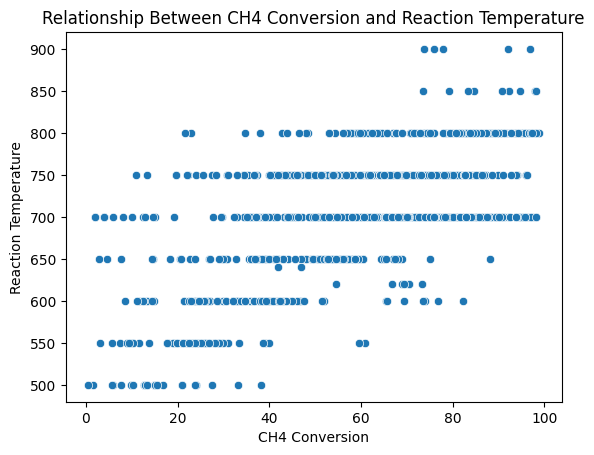

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Create a scatter plot
sns.scatterplot(x='CH4 Conversion', y='Reaction Temperature', data=df_encoded)

# Set the plot title and labels
plt.title('Relationship Between CH4 Conversion and Reaction Temperature')
plt.xlabel('CH4 Conversion')
plt.ylabel('Reaction Temperature')

Text(0, 0.5, 'Reaction Temperature')

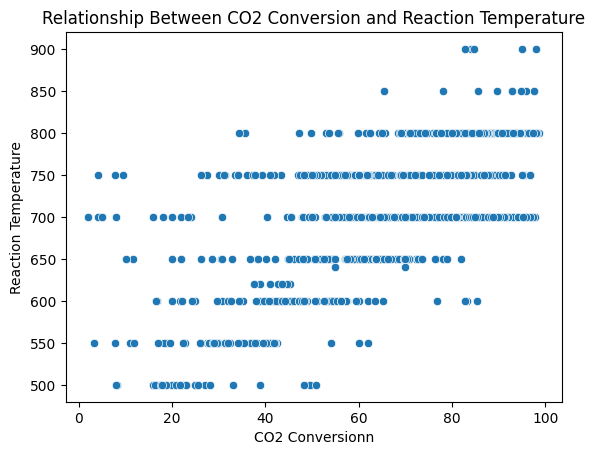

In [22]:
# Create a scatter plot
sns.scatterplot(x='CO2 Conversion', y='Reaction Temperature', data=df_encoded)

# Set the plot title and labels
plt.title('Relationship Between CO2 Conversion and Reaction Temperature')
plt.xlabel('CO2 Conversionn')
plt.ylabel('Reaction Temperature')

Text(0, 0.5, 'Reaction Temperature')

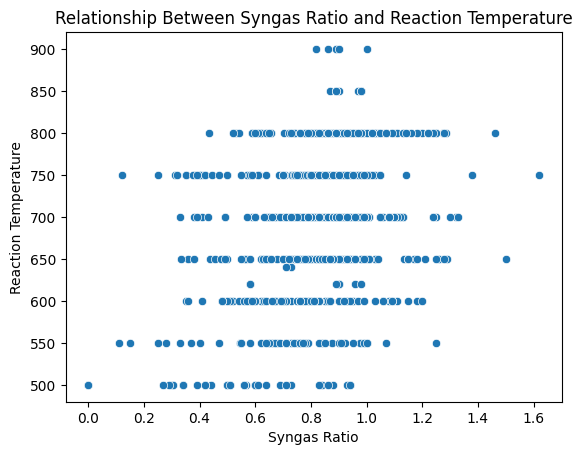

In [23]:
# Create a scatter plot
sns.scatterplot(x='Syngas_Ratio', y='Reaction Temperature', data=df_encoded)

# Set the plot title and labels
plt.title('Relationship Between Syngas Ratio and Reaction Temperature')
plt.xlabel('Syngas Ratio')
plt.ylabel('Reaction Temperature')